In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, join
from glob import glob

plt.rcParams['figure.figsize'] = (12, 6)

# Deep catalogs

TU inputs:

1. EUC-GALCAT-2020-01-16_HPIX_5_NEST_4014.fits
2. EUC-GALCAT-2020-01-16_HPIX_5_NEST_4015.fits
3. EUC_SIM_STAR-CAT* reorganized using Healpix: 4014 and 4015

Added Subaru IB to galaxies:

```bash
PhzAddBands \
    --sed-lib ~/Work/Data/SC8/TU/Lib/EUC-TEST-GSEDLIB-2015-03-18T171100.000.fits \
    --ref-filter ~/Work/Data/SC8/TU/Lib/EUC-TEST-FILSDSSR01-2015-02-02T203100.000.fits \
    --ext-lib ~/Work/Data/SC8/TU/Lib/EUC-TEST-GEXTLAWLIB-2015-03-18T203100.000.fits \
    --ext-map ~/Work/Data/SC8/TU/Lib/HFI_CompMap_ThermalDustModel_2048_R1.20_V2.fits \
    --filter-list ~/Work/Data/StarSeds/stars_filters.list \
    --input-size 251000 \
    ~/Work/Data/SC8/TU/Galaxies/Deep/EUC-GALCAT-2020-01-16_HPIX_5_NEST_4014.fits IB_4014.fits
```

Added Subaru IB to stars:

```bash
PhzAddBands \
    --sed-lib ~/Work/Data/SC8/TU/Lib/EUC-TEST-SEDLIB-2013-11-14_MODIF.fits \
    --ref-filter ~/Work/Data/SC8/TU/Lib/EUC_SIM_FILTER-H-2MASS_20190312T161600.000000Z_0.0.fits \
    --filter-list ~/Work/Data/StarSeds/stars_filters.list 
    --input-size 18000 4014.fits IB_4014.fits
```

Contents of `stars_filters.list`

```
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/euclid/VIS.dat:euclid_VIS
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/euclid/J.dat:euclid_J
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/euclid/H.dat:euclid_H
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/euclid/Y.dat:euclid_Y
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/lsst/u.dat:lsst_u
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/lsst/g.dat:lsst_g
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/lsst/r.dat:lsst_r
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/lsst/i.dat:lsst_i
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/lsst/z.dat:lsst_z
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB427.dat:TU_FNU_IB427_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB464.dat:TU_FNU_IB464_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB484.dat:TU_FNU_IB484_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB505.dat:TU_FNU_IB505_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB527.dat:TU_FNU_IB527_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB574.dat:TU_FNU_IB574_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB624.dat:TU_FNU_IB624_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB679.dat:TU_FNU_IB679_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB709.dat:TU_FNU_IB709_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB738.dat:TU_FNU_IB738_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB767.dat:TU_FNU_IB767_SUBARU
/home/aalvarez/Phosphoros/AuxiliaryData/Filters/Subaru/IB827.dat:TU_FNU_IB827_SUBARU
```

Generated MER-like catalog as:

```bash
PhzMockMerFromTu --depth deep --size 250000 IB_4015.fits MOCK_MER_DEEP_GAL_4015.fits
# For stars
PhzMockMerFromTu --depth deep --size 16000 IB_4014.fits MOCK_MER_DEEP_STARS_4014.fits
```

16k is roughly the same proportion with respect a TU star catalog as the fraction of galaxies taken.

The two outputs are merged using topcat.

Output:

1. MOCK_MER_DEEP_4014.fits
2. MOCK_MER_DEEP_4015.fits

In [12]:
deep_paths = glob('/home/aalvarez/Work/Data/SC8/TU/MOCK_MER_DEEP_401?.fits')
deep_cats = [Table.read(p) for p in deep_paths]
deep = vstack(deep_cats)

In [13]:
total = 0
for p, c in zip(deep_paths, deep_cats):
    print(os.path.basename(p), len(c))
    total += len(c)
print('Total number of sources:', total)

MOCK_MER_DEEP_4015.fits 265000
MOCK_MER_DEEP_4014.fits 264958
Total number of sources: 529958


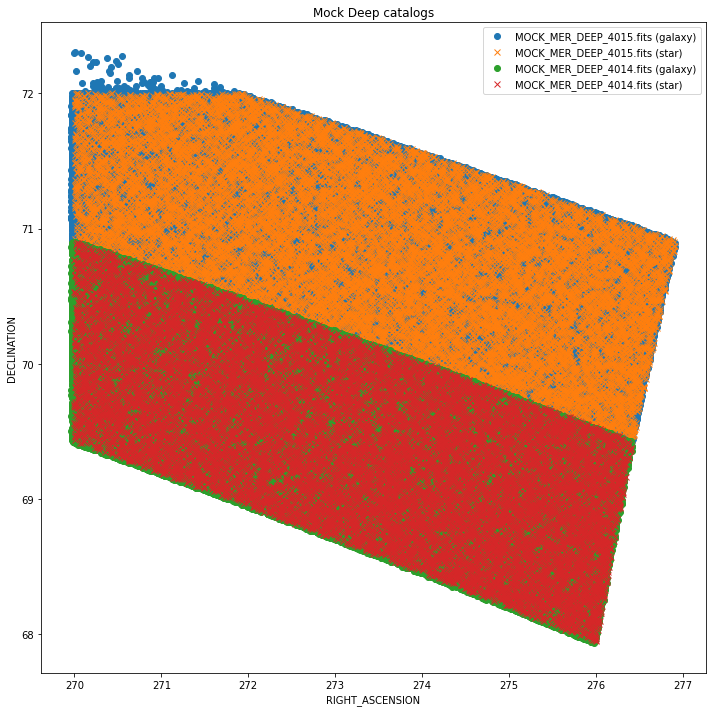

In [14]:
plt.figure(figsize=(10, 10))
for p, c in zip(deep_paths, deep_cats):
    gal = c['GALAXY'] == 1
    plt.plot(c['RIGHT_ASCENSION'][gal], c['DECLINATION'][gal], 'o', label=os.path.basename(p) + ' (galaxy)')
    plt.plot(c['RIGHT_ASCENSION'][~gal], c['DECLINATION'][~gal], 'x', label=os.path.basename(p) + ' (star)')
plt.xlabel('RIGHT_ASCENSION')
plt.ylabel('DECLINATION')
plt.title('Mock Deep catalogs')
plt.legend()
plt.tight_layout()

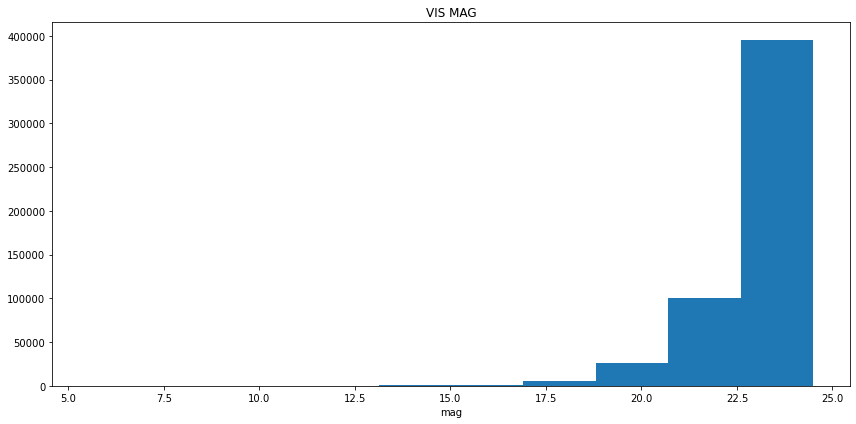

In [15]:
plt.figure()
plt.hist(deep['MAG_VIS_APER'], histtype='bar', stacked=True)
plt.title('VIS MAG')
plt.xlabel(str(deep_cats[0]['MAG_VIS_APER'].unit))
plt.tight_layout()

In [16]:
fluxes = [c.split('_', 1)[1] for c in deep.colnames if c.startswith('FLUX_')]

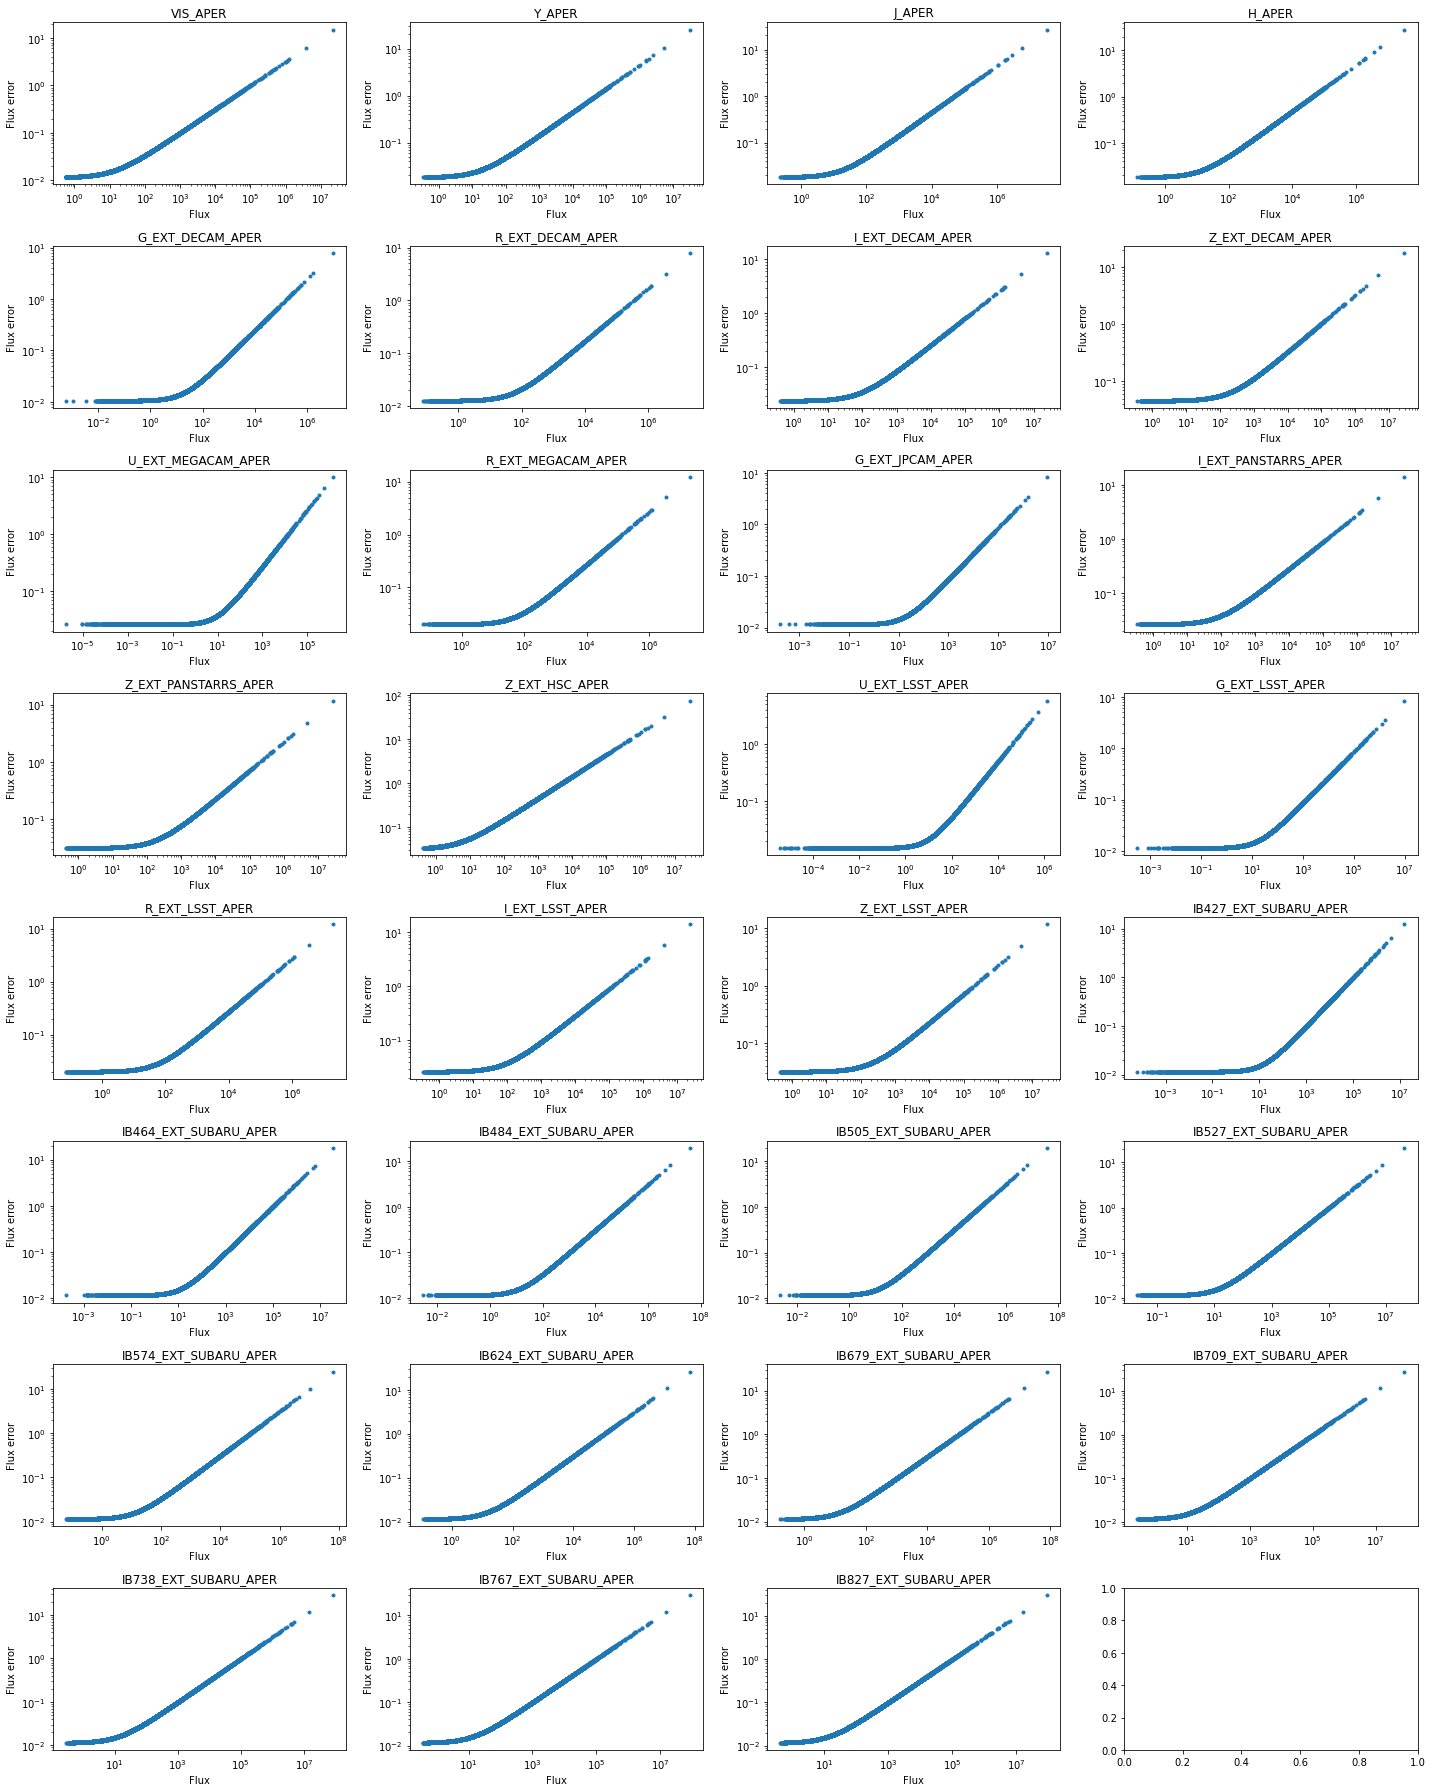

In [18]:
ncols = 4
nrows = len(fluxes) // ncols + (len(fluxes) % ncols > 0) 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))

for flux, ax in zip(fluxes, axes.ravel()):
    ax.set_title(flux)
    ax.plot(deep['FLUX_' + flux], deep['FLUXERR_' + flux], '.')
    ax.set_xlabel('Flux')
    ax.set_ylabel('Flux error')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
plt.tight_layout()

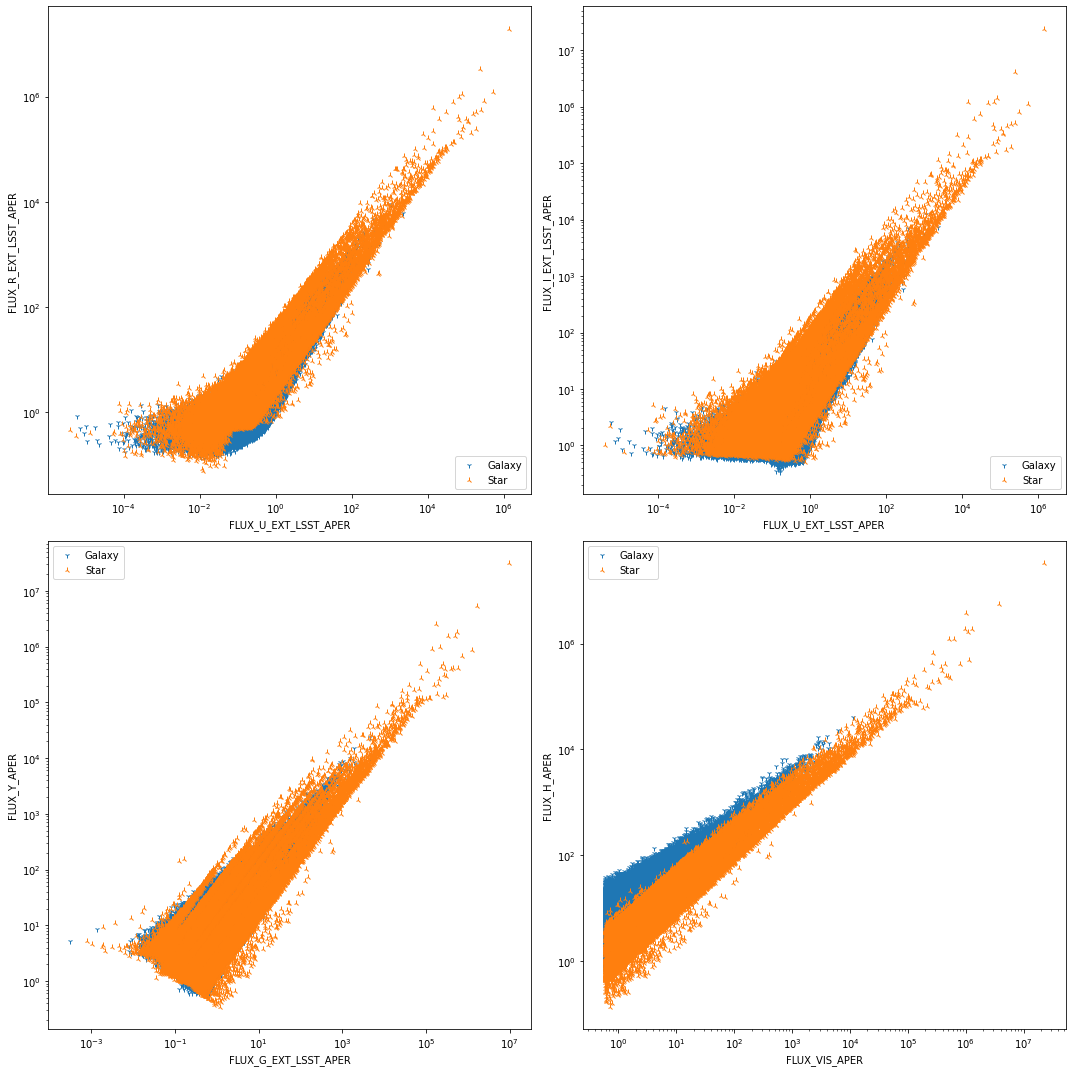

In [25]:
colors = [
    ('FLUX_U_EXT_LSST_APER', 'FLUX_R_EXT_LSST_APER'),
    ('FLUX_U_EXT_LSST_APER', 'FLUX_I_EXT_LSST_APER'),
    ('FLUX_G_EXT_LSST_APER', 'FLUX_Y_APER'),
    ('FLUX_VIS_APER', 'FLUX_H_APER'),
]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for (a, b), ax in zip(colors, axes.ravel()):
    gal = deep['GALAXY'] == 1
    ax.plot(deep[a][gal], deep[b][gal], '1', label='Galaxy')
    ax.plot(deep[a][~gal], deep[b][~gal], '2', label='Star')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
plt.tight_layout()

In [19]:
deep_orig_paths = glob('/home/aalvarez/Work/Data/SC8/TU/Galaxies/Deep/EUC-GALCAT-2020-01-16_HPIX_5_NEST_401?.fits')
deep_orig_cats = [Table.read(p, memmap=True) for p in deep_orig_paths]

In [20]:
deep_orig = vstack(deep_orig_cats)
deep_orig.rename_column('SOURCE_ID', 'OBJECT_ID')

In [21]:
deep_joined = join(deep_orig, deep, 'OBJECT_ID')

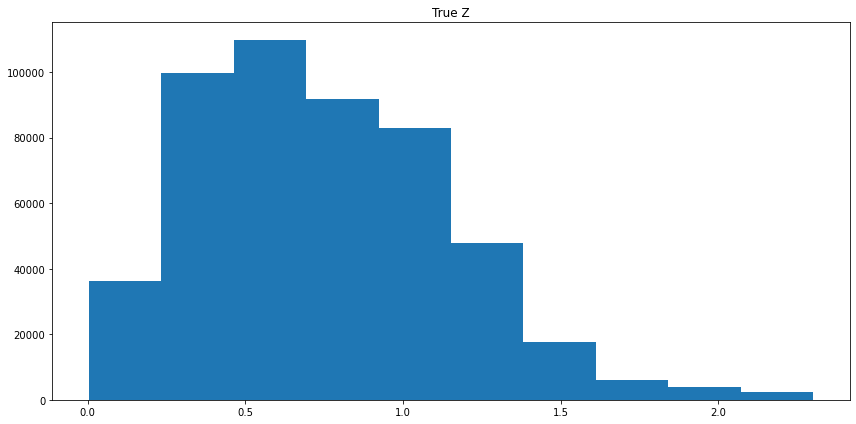

In [22]:
plt.figure()
plt.hist(deep_joined['Z_OBS'])
plt.title('True Z')
plt.tight_layout()